In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers.core import Dense, Activation
from process import *

In [128]:
import csv

In [45]:
data = process()
# with open('data/E0 (1).csv', 'r', encoding='iso-8859-1') as f:
#     reader = csv.reader(f)
#     for row in reader:
#         data.append(row[: 26])
        
# data = pd.DataFrame(np.array(data))

In [46]:
data

,0,1,2,3,4,5,6,7,8,9,...,10757,10758,10759,10760,10761,10762,10763,10764,10765,10766
0,"[Div, Date, HomeTeam, AwayTeam, FTHG, FTAG, FT...","[E0, 13/08/16, Burnley, Swansea, 0, 1, A, 0, 0...","[E0, 13/08/16, Crystal Palace, West Brom, 0, 1...","[E0, 13/08/16, Everton, Tottenham, 1, 1, D, 1,...","[E0, 13/08/16, Hull, Leicester, 2, 1, H, 1, 0,...","[E0, 13/08/16, Man City, Sunderland, 2, 1, H, ...","[E0, 13/08/16, Middlesbrough, Stoke, 1, 1, D, ...","[E0, 13/08/16, Southampton, Watford, 1, 1, D, ...","[E0, 14/08/16, Arsenal, Liverpool, 3, 4, A, 1,...","[E0, 14/08/16, Bournemouth, Man United, 1, 3, ...",...,"[E0, 22/05/11, Aston Villa, Liverpool, 1, 0, H...","[E0, 22/05/11, Bolton, Man City, 0, 2, A, 0, 1...","[E0, 22/05/11, Everton, Chelsea, 1, 0, H, 0, 0...","[E0, 22/05/11, Fulham, Arsenal, 2, 2, D, 1, 1,...","[E0, 22/05/11, Man United, Blackpool, 4, 2, H,...","[E0, 22/05/11, Newcastle, West Brom, 3, 3, D, ...","[E0, 22/05/11, Stoke, Wigan, 0, 1, A, 0, 0, D,...","[E0, 22/05/11, Tottenham, Birmingham, 2, 1, H,...","[E0, 22/05/11, West Ham, Sunderland, 0, 3, A, ...","[E0, 22/05/11, Wolves, Blackburn, 2, 3, A, 0, ..."
1,"[Div, Date, HomeTeam, AwayTeam, FTHG, FTAG, FT...","[E0, 13/08/16, Burnley, Swansea, 0, 1, A, 0, 0...","[E0, 13/08/16, Crystal Palace, West Brom, 0, 1...","[E0, 13/08/16, Everton, Tottenham, 1, 1, D, 1,...","[E0, 13/08/16, Hull, Leicester, 2, 1, H, 1, 0,...","[E0, 13/08/16, Man City, Sunderland, 2, 1, H, ...","[E0, 13/08/16, Middlesbrough, Stoke, 1, 1, D, ...","[E0, 13/08/16, Southampton, Watford, 1, 1, D, ...","[E0, 14/08/16, Arsenal, Liverpool, 3, 4, A, 1,...","[E0, 14/08/16, Bournemouth, Man United, 1, 3, ...",...,"[E0, 22/05/11, Aston Villa, Liverpool, 1, 0, H...","[E0, 22/05/11, Bolton, Man City, 0, 2, A, 0, 1...","[E0, 22/05/11, Everton, Chelsea, 1, 0, H, 0, 0...","[E0, 22/05/11, Fulham, Arsenal, 2, 2, D, 1, 1,...","[E0, 22/05/11, Man United, Blackpool, 4, 2, H,...","[E0, 22/05/11, Newcastle, West Brom, 3, 3, D, ...","[E0, 22/05/11, Stoke, Wigan, 0, 1, A, 0, 0, D,...","[E0, 22/05/11, Tottenham, Birmingham, 2, 1, H,...","[E0, 22/05/11, West Ham, Sunderland, 0, 3, A, ...","[E0, 22/05/11, Wolves, Blackburn, 2, 3, A, 0, ..."
2,"[Div, Date, HomeTeam, AwayTeam, FTHG, FTAG, FT...","[E0, 13/08/16, Burnley, Swansea, 0, 1, A, 0, 0...","[E0, 13/08/16, Crystal Palace, West Brom, 0, 1...","[E0, 13/08/16, Everton, Tottenham, 1, 1, D, 1,...","[E0, 13/08/16, Hull, Leicester, 2, 1, H, 1, 0,...","[E0, 13/08/16, Man City, Sunderland, 2, 1, H, ...","[E0, 13/08/16, Middlesbrough, Stoke, 1, 1, D, ...","[E0, 13/08/16, Southampton, Watford, 1, 1, D, ...","[E0, 14/08/16, Arsenal, Liverpool, 3, 4, A, 1,...","[E0, 14/08/16, Bournemouth, Man United, 1, 3, ...",...,"[E0, 22/05/11, Aston Villa, Liverpool, 1, 0, H...","[E0, 22/05/11, Bolton, Man City, 0, 2, A, 0, 1...","[E0, 22/05/11, Everton, Chelsea, 1, 0, H, 0, 0...","[E0, 22/05/11, Fulham, Arsenal, 2, 2, D, 1, 1,...","[E0, 22/05/11, Man United, Blackpool, 4, 2, H,...","[E0, 22/05/11, Newcastle, West Brom, 3, 3, D, ...","[E0, 22/05/11, Stoke, Wigan, 0, 1, A, 0, 0, D,...","[E0, 22/05/11, Tottenham, Birmingham, 2, 1, H,...","[E0, 22/05/11, West Ham, Sunderland, 0, 3, A, ...","[E0, 22/05/11, Wolves, Blackburn, 2, 3, A, 0, ..."
3,"[Div, Date, HomeTeam, AwayTeam, FTHG, FTAG, FT...","[E0, 13/08/16, Burnley, Swansea, 0, 1, A, 0, 0...","[E0, 13/08/16, Crystal Palace, West Brom, 0, 1...","[E0, 13/08/16, Everton, Tottenham, 1, 1, D, 1,...","[E0, 13/08/16, Hull, Leicester, 2, 1, H, 1, 0,...","[E0, 13/08/16, Man City, Sunderland, 2, 1, H, ...","[E0, 13/08/16, Middlesbrough, Stoke, 1, 1, D, ...","[E0, 13/08/16, Southampton, Watford, 1, 1, D, ...","[E0, 14/08/16, Arsenal, Liverpool, 3, 4, A, 1,...","[E0, 14/08/16, Bournemouth, Man United, 1, 3, ...",...,"[E0, 22/05/11, Aston Villa, Liverpool, 1, 0, H...","[E0, 22/05/11, Bolton, Man City, 0, 2, A, 0, 1...","[E0, 22/05/11, Everton, Chelsea, 1, 0, H, 0, 0...","[E0, 22/05/11, Fulham, Arsenal, 2, 2, D, 1, 1,...","[E0, 22/05/11, Man United, Blackpool, 4, 2

In [47]:
fixture = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool') and (row[2] == 'Aston Villa' or row[3] == 'Aston Villa'):
            fixture.append(row) 
    
    x += 10
    size += 10


fixture = pd.DataFrame(fixture)

In [49]:
fixture

""


In [129]:
fixtures = []
x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            if row[2] == 'Liverpool':
                row.drop([3, 5, 6, 8, 9, 10, 12, 14, 16, 18, 20, 22, 23, 24, 25], inplace=True)
                row = [x for x in row if x != 'NaN']
                fixtures.append(row) 
                
            elif row[3] == 'Liverpool':
                row.drop([2, 4, 6, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23, 24, 25], inplace=True)
                row = [x for x in row if x != 'NaN']
                fixtures.append(row) 
            
    x += 10
    size += 10


fixtures = pd.DataFrame(fixtures)

In [130]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10
0,E0,14/08/16,Liverpool,4,1,16,7,17,4,3,0
1,E0,20/08/16,Liverpool,0,0,26,5,5,12,1,0
2,E0,27/08/16,Liverpool,1,1,13,3,17,5,5,0
3,E0,10/09/16,Liverpool,4,2,17,11,4,1,1,0
4,E0,16/09/16,Liverpool,2,2,13,5,13,4,1,0
5,E0,24/09/16,Liverpool,5,3,32,12,8,13,1,0
6,E0,01/10/16,Liverpool,2,0,18,6,9,10,2,0
7,E0,17/10/16,Liverpool,0,0,9,3,14,3,0,0
8,E0,22/10/16,Liverpool,2,2,21,7,9,3,1,0
9,E0,29/10/16,Liverpool,4,3,17,10,5,3,2,0


In [131]:
season = []
all_seasons = []

try:
    for i in range(1, 27):
        if i not in range(9, 16):
            with open('data/E0 ({}).csv'.format(i), mode='r', encoding='iso-8859-1') as f:
                reader = csv.reader((line.replace('\0','') for line in f))
                for row in reader:
                    season.append(row[:26])

#             all_seasons.append(season)
except csv.Error:
    print('null byte')
    
data = pd.DataFrame(np.array(season))

In [53]:
data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
1,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,D,...,14,7,4,3,2,0,0,2.4,3.3,3.25
2,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,D,...,15,3,6,2,2,0,0,2,3.3,4.5
3,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,H,...,14,5,6,0,0,0,0,3.2,3.4,2.4
4,E0,13/08/16,Hull,Leicester,2,1,H,1,0,H,...,17,5,3,2,2,0,0,4.5,3.6,1.91
5,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,H,...,14,9,6,1,2,0,0,1.25,6.5,15
6,E0,13/08/16,Middlesbrough,Stoke,1,1,D,1,0,H,...,14,9,6,3,5,0,0,2.38,3.2,3.4
7,E0,13/08/16,Southampton,Watford,1,1,D,0,1,A,...,12,6,2,1,2,0,1,1.8,3.75,5
8,E0,14/08/16,Arsenal,Liverpool,3,4,A,1,1,D,...,17,5,4,3,3,0,0,2.4,3.5,3.1
9,E0,14/08/16,Bournemouth,Man United,1,3,A,0,1,A,...,10,4,2,0,1,0,0,4.75,3.6,1.85


In [132]:
fixtures = []

x = 0
size = 10

for i in range(data.shape[0]):
    d = data[x:size]
    for index, row in d.iterrows():
        
        record = np.empty(14, dtype=object)
        
        if (row[2] == 'Liverpool' or row[3] == 'Liverpool'):
            
            row = row.tolist()
            record[0] = row[1].split('/')[1]
            
            if row[2] == 'Liverpool':
                record[1] = 1
                
                if row[9] == 'A': record[4] = 0 
                elif row[9] == 'H': record[4] = 3
                else: record[4] = 1
                    
            elif row[3] == 'Liverpool':
                record[1] = 0
                
                if row[9] == 'A': record[4] = 3 
                elif row[9] == 'H': record[4] = 0
                else: record[4] = 1
            
            record[2] = row[7]
            record[3] = row[8]
            record[5] = row[23]
            record[6] = row[24]
            record[7] = row[25]
            
            # y's
            record[8] = row[4]
            record[9] = row[5]
            record[10] = row[17]
            record[11] = row[18]
            record[12] = row[19]
            record[13] = row[20]
            
            fixtures.append(record)
            
            
    x += 10
    size += 10


fixtures = pd.DataFrame(fixtures)

In [133]:
fixtures

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,08,0,1,1,1,2.4,3.5,3.1,3,4,5,4,3,3
1,08,0,2,0,0,6.5,4.2,1.57,2,0,1,12,0,1
2,08,0,0,1,3,2.38,3.4,3,1,1,5,5,3,5
3,09,1,2,1,3,1.7,4,5.5,4,1,1,7,1,2
4,09,0,0,2,3,2.25,3.5,3.4,1,2,6,4,1,1
5,09,1,3,0,3,1.22,7,15,5,1,13,2,1,2
6,10,0,1,0,0,8,4.75,1.45,1,2,3,10,2,2
7,10,1,0,0,1,2.2,3.5,3.5,0,0,3,1,0,4
8,10,1,2,0,3,1.29,6,13,2,1,3,2,1,3
9,10,0,2,3,3,5.25,4,1.7,2,4,3,3,1,2


In [134]:
dataset = fixtures.astype('float64').values
Xtrain = dataset[:600,0:8]
Ytrain = dataset[:600,8:9]
Xtest = dataset[600:,0:8]
Ytest = dataset[600:,8:9]

In [149]:
model = Sequential()
model.add(Dense(300, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])

In [152]:
train = model.fit(Xtrain, Ytrain, epochs=7, batch_size=5, validation_split = 0.3, shuffle=True)

Train on 420 samples, validate on 180 samples
Epoch 1/7
420/420 [==============================] - 0s 383us/step - loss: 0.7588 - acc: 0.3905 - val_loss: 0.8857 - val_acc: 0.3444
Epoch 2/7
420/420 [==============================] - 0s 309us/step - loss: 0.7953 - acc: 0.4119 - val_loss: 0.6938 - val_acc: 0.4667
Epoch 3/7
420/420 [==============================] - 0s 326us/step - loss: 0.7724 - acc: 0.4095 - val_loss: 0.6977 - val_acc: 0.4000
Epoch 4/7
420/420 [==============================] - 0s 316us/step - loss: 0.7668 - acc: 0.4262 - val_loss: 0.7074 - val_acc: 0.3833
Epoch 5/7
420/420 [==============================] - 0s 307us/step - loss: 0.7487 - acc: 0.4095 - val_loss: 0.8645 - val_acc: 0.4278
Epoch 6/7
420/420 [==============================] - 0s 363us/step - loss: 0.7907 - acc: 0.4167 - val_loss: 0.7585 - val_acc: 0.3944
Epoch 7/7
420/420 [==============================] - 0s 333us/step - loss: 0.7601 - acc: 0.4095 - val_loss: 0.9205 - val_acc: 0.3389


In [153]:
score = model.evaluate(Xtest, Ytest, batch_size=32)
score

122/122 [==============================] - 0s 72us/step


[0.8956108357085556, 0.34426229752478055]

array([[2.6522262 ],
       [0.67688715],
       [3.0105457 ],
       [0.6691693 ]], dtype=float32)

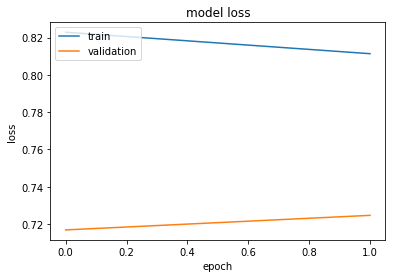

In [148]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()